#Project Natural Language Processing#

DOMAIN: Digital content management

• CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc.
are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a
classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

• DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or
approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and
the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is
marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of
common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the
date of the following post and links within a post are denoted by the label url link.

• PROJECT OBJECTIVE: To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.

***Q 1. Read and Analyse Dataset.***

     A. Clearly write outcome of data analysis(Minimum 2 points)

     B. Clean the Structured Data 
       *   Missing value analysis and imputation.
       *   Eliminate Non-English textual data.



Hint: Refer ‘langdetect’ library to detect language of

In [1]:
import numpy as np
import re
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
project_path = '/content/drive/My Drive/Colab Notebooks/NLTP/'

In [4]:
import csv
import pandas as pd


In [5]:
blog_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLTP/blogtext.csv")

In [6]:
blog_df = blog_df.sample(frac=0.1, random_state=5)
blog_df.head(5)

,id,gender,age,topic,sign,date,text
29489,3866560,male,17,indUnk,Pisces,"09,July,2004","hello everyone, i said earlier that i w..."
629883,3131734,male,24,Engineering,Sagittarius,"03,July,2004",Happy happy~~!! Today is a happy day fo...
281010,958176,male,17,Non-Profit,Gemini,"02,June,2004","Heheh. Good heavens, childe. This sound..."
424094,1298624,male,25,Technology,Aries,"21,August,2003",...and it arrives today?! My l...
245647,1237310,male,38,Arts,Taurus,"27,June,2004",A PLACE IN THE SUN (1951) Direct...


In [7]:
blog_df.shape

(68128, 7)

***Ans 1***

The Data has 7 columns
- id - represnting the user
- geneder - a categorical data
- age     - a continious numeric data 
- topic   - a categorical variable that represents the user type
- sign    - a categorial data that represents the zodiac signs
- date    - Date value
- text    - String data - The blog text the user has submitted 

There are 681284 rows in the dataset.

'Student' and 'indUnk' topic has major inputs in the dataset.

In [8]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [9]:
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [10]:
# reomove any characters that has ascii value greater than 127 for non-English character
blog_df['text'] = blog_df['text'].apply(lambda x: ''.join(c for c in x if 0 < ord(c) < 127) )

In [11]:
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

2. Preprocess unstructured data to make it consumable for model training.

- A. Eliminate All special Characters and Numbers 
- B. Lowercase all textual data 
- C. Remove all Stopwords
- D. Remove all extra white spaces

In [12]:
# Eliminate All special Characters and numbers
blog_df['text'] = blog_df['text'].apply(lambda x: re.sub(r"[^a-zA-Z ]", "", x) )

In [13]:
print( blog_df['text'][0])

           Info has been found   pages and  MB of pdf files Now i have to wait untill our team leader has processed it and learns html         


In [14]:
# Convert all textual data to lowercase
blog_df['text'] = blog_df['text'].apply(lambda x: x.lower() )

In [15]:
# Remove all Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
engStopWords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
blog_df['text'] = blog_df['text'].apply(lambda x:  ' '.join([word for word in x.split() if word not in engStopWords]))


In [17]:
# Remove all extra white spaces
blog_df['text'] = blog_df['text'].apply(lambda x:  re.sub(" +", " ",x.strip()) )


Q 3. Build a base Classification model
- A. Create dependent and independent variables  Hint: Treat ‘topic’ as a Target variable.
- B. Split data into train and test.
- C. Vectorize data using any one vectorizer.
- D. Build a base model for Supervised Learning - Classification.
- E. Clearly print Performance Metrics. 

Split the dataframe columns topic as y target classifier column and rest of the columns as training input data 

In [18]:
blog_df.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

In [19]:
# Convert the training data into categorical values -  Convert topic, Gender and Sign features to categorical values using oneHotEncoder
from sklearn.preprocessing import OneHotEncoder

blog_df['gender'] = blog_df['gender'].astype('category')
blog_df['sign'] = blog_df['sign'].astype('category')
blog_df['topic'] = blog_df['topic'].astype('category')


In [20]:
blog_df['gen_cat'] = blog_df['gender'].cat.codes
blog_df['sign_cat']  = blog_df['sign'].cat.codes
blog_df['topic_cat']  = blog_df['topic'].cat.codes

In [21]:
blog_df.head(5)

,id,gender,age,topic,sign,date,text,gen_cat,sign_cat,topic_cat
29489,3866560,male,17,indUnk,Pisces,"09,July,2004",hello everyone said earlier wouldnt writing ev...,1,7,39
629883,3131734,male,24,Engineering,Sagittarius,"03,July,2004",happy happy today happy day hehehe went meet c...,1,8,14
281010,958176,male,17,Non-Profit,Gemini,"02,June,2004",heheh good heavens childe sounds like horrid s...,1,4,28
424094,1298624,male,25,Technology,Aries,"21,August,2003",arrives today laptop shipped yesterday arrived...,1,1,35
245647,1237310,male,38,Arts,Taurus,"27,June,2004",place sun directed george stevens tragic famil...,1,10,4


In [22]:
# Create dependent and independent variables 
X = blog_df['text']
Y = blog_df['topic_cat']

In [23]:
# Split data into train and test.
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=5,)

In [25]:
# Vectorize data 

# build Vocabulary
from nltk import word_tokenize
nltk.download('punkt')

blog_voc = set()
for index, row in blog_df.iterrows():
    blog_voc.update(word_tokenize(row['text']))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
blog_voc = list(blog_voc)
word_index = {w: index for index, w in enumerate(blog_voc)}

In [27]:
VOCABULARY_SIZE = len(blog_voc)
DOCUMENTS_COUNT = len(blog_df)

In [28]:
print( VOCABULARY_SIZE, DOCUMENTS_COUNT )

279146 68128


In [29]:
def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return words

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer( stop_words = engStopWords, tokenizer=tokenize, vocabulary=blog_voc)

In [31]:
tfidf

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fd14d52fb90>,
                vocabulary=['dartboard', 'gorgon', 'azukeru', 'alafaya',
                            'fuhreakin', 'hutchtemmel', 'loachs', 'memawo',
                            'halsey', 'bindoffs', 'ltly', 'justnbspcrashed',
                            'floorall', 'manhahas', 'nightdrunk', 'allcotton',
                            'almontybut', 'mobihome', 'phewkinda', 'lemeans',
                            'ocala', 'herepost', 'fabo', 'boredstressed',
                            'ludicrousness', 'wwee

In [32]:
# Fit to the data and transform to feature matrix
X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf.shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


(51096, 279146)

In [33]:
# Build a base model for Supervised Learning - Classification.
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV

In [34]:
#svmClsfr = svm.SVC(kernel='linear', probability=True)
#svmClsfr.fit(X_train_tfidf, y_train)


In [35]:
sgd_clf = SGDClassifier(loss='log', random_state=5)


In [36]:
sgd_clf.fit(X_train_tfidf, y_train)

SGDClassifier(loss='log', random_state=5)

In [37]:
sgd_scores = sgd_clf.score( X_train_tfidf, y_train)
print(sgd_scores)


0.41302645999686866


In [38]:
# Clearly print Performance Metrics.
# Fit to the test data and transform to feature matrix
X_test_tfidf = tfidf.fit_transform(X_test)
X_test_tfidf.shape

(17032, 279146)

In [39]:
pred_test = sgd_clf.predict(X_test_tfidf)

In [40]:
test_accuracy=accuracy_score(y_test, pred_test)

print('Test Accuracy: ',np.round(test_accuracy,2))

Test Accuracy:  0.39


In [41]:
y_train_pred = sgd_clf.decision_function(X_train_tfidf)    
y_test_pred = sgd_clf.decision_function(X_test_tfidf) 

In [42]:
pred_log_test = sgd_clf.predict(X_test_tfidf)

In [43]:
pred_log_test

array([39, 39, 39, ..., 39, 39, 39], dtype=int8)

In [76]:
# Calculate and print the confusion matrix for the KNN trainded model on test data score
#cm_sgd = confusion_matrix( pred_log_test, y_test)

#df_sgd_knn = pd.DataFrame(cm_sgd, index = [i for i in ["1","0"]],
                  #columns = [i for i in ["Predict 1","Predict 0"]])
#plt.figure(figsize = (7,5))
#sns.heatmap(df_sgd_knn, annot=True, fmt='d' , cmap='Blues' )

In [77]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#calibrator = CalibratedClassifierCV(sgd_clf, cv='prefit')
#model=calibrator.fit(X_train_tfidf, y_train)
#y_test_pred = 

# Print the ROC AUC curve
#sg_roc_auc = roc_auc_score(y_test, sgd_clf.predict_proba(X_test_tfidf), multi_class='ovr' )
#fpr, tpr, thresholds = roc_curve(y_test, sgd_clf.predict_proba(X_test_tfidf))
#plt.figure()
#plt.plot(fpr, tpr, label='(area = %0.2f)' % sg_roc_auc)
#plt.plot([0, 1], [0, 1],'r--',label='No Skill')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()

***4. Improve Performance of model.***
- A. Experiment with other vectorisers. 
- B. Build classifier Models using other algorithms than base model.
- C. Tune Parameters/Hyperparameters of the model/s.
- D. Clearly print Performance Metrics.

In [45]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
CntVecz = CountVectorizer(max_features=1000)
X_CV = CntVecz.fit_transform(X).toarray()

In [46]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_CV,Y, test_size=0.25, random_state=5,)

In [47]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
#svc_model = SVC(C= .1, kernel='linear', gamma= 1, random_state=1)
#svc_model.fit(X_train1, y_train1)

#prediction = svc_model.predict(X_test1)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
KNN_Classifiers = KNeighborsClassifier(n_neighbors=3, weights = 'distance')

# Train the model with  data 
KNN_Classifiers.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [49]:
predicted_labels_knn = KNN_Classifiers.predict(X_test1)
KNN_Classifiers.score(X_test1, y_test1)

0.21823626115547204

In [50]:
#  Tune Parameters 
from sklearn import metrics
k_values = [11,13,15, 17,19,21,23,25]
scores = {}
scores_list = []
for k in k_values:
   KNNClsfr = KNeighborsClassifier(n_neighbors=k)
   KNNClsfr.fit(X_train1, y_train1)
   y_pred1 = KNNClsfr.predict(X_test1)
   scores[k] = metrics.accuracy_score(y_test1,y_pred1)
   scores_list.append(metrics.accuracy_score(y_test1,y_pred1))

In [51]:
result = metrics.confusion_matrix(y_test1, y_pred1)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test1, y_pred1)
print("Classification Report:",)
print (result1)


Confusion Matrix:
[[   1    0    0 ...    0    0   74]
 [   0    0    0 ...    0    0   83]
 [   0    0    0 ...    0    0   23]
 ...
 [   0    0    0 ...    0    0   41]
 [   0    0    0 ...    0    8   34]
 [   0    0    0 ...    0    1 4710]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        96
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        29
           4       0.10      0.00      0.00       816
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        55
           8       0.67      0.02      0.04       110
           9       0.00      0.00      0.00       125
          10       0.00      0.00      0.00       493
          11       0.00      0.00      0.00        28
          12       0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Accuracy')

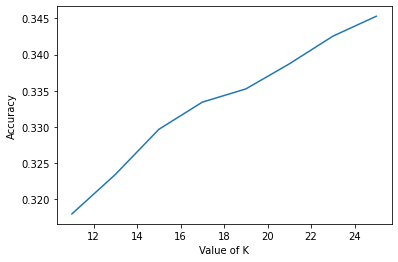

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_values,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

***5. Share insights on relative performance comparison***
- A. Which vectorizer performed better? Probable reason?.
- B. Which model outperformed? Probable reason?
- C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?
- D. According to you, which performance metric should be
given most importance, why?

***Which vectorizer performed better? Probable reason?.***
TFIDF performed better compared to countvectorizer.
But count vectorizer showed improvement on increasing the neighbour count

***B. Which model outperformed? Probable reason?***
SGDClassifier outperformed Nearest Neighbour.  SGDClassifier uses a sample data to detemine the Gradient decent and finds the optimum value.
Logisitic Regression and SVM took more compuatation time and did not complete even after activiating GPU.

***C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?***
Increasing the neigbhour count improved the model performance.

***D. According to you, which performance metric should be given most importance, why?***
The ROC would reflect the better performance of the model.  As this is a multi-class classification,  Determining ROC for multiple class is challenging and might not provide the actual performance.  
Confusion matrix and classification report  (precision and Recall) might be referred for classification performance 
Accuracy might vary based on the sample test data but can provide a high level lean of the performance indicator towards less or more accuracy


*** DOMAIN: Customer support ***

- • CONTEXT: Great Learning has a an academic support department which receives numerous support requests every day throughout the year.
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human support executive if the request is complex or not in it’s database.

- • DATA DESCRIPTION: A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.

- • PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:

 1. Start chat session with greetings and ask what the user is looking for. 

2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. 

3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. Hint: There are a lot of techniques using which one can clean and prepare the data which can be used to train a ML/DL classifier. Hence, it might require you to experiment, research, self learn and implement the above classifier. There might be many iterations between hand building the corpus and designing the best fit text classifier. As the quality and quantity of corpus increases the model’s performance i.e. ability to answer right questions also increases.

In [54]:

import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [55]:
project_path1 = '/content/drive/My Drive/Colab Notebooks/NLTP/'
file_path1 = project_path1 + 'GL_Bot_New.json'

In [56]:
# Read the json corpus data
import json
json_data = json.loads( open( file_path1 ).read( ) )

In [57]:
corps_voc = set()
corps_tags = []
corps_word_tag = []

In [58]:
print(json_data)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [59]:
# Iterate JSOn data and load contents (Corpus has Intents that has a structure
# tag - High level group
# patterns - possible inputs from user for training the model
# response -  List of responses that can be provided randomly if more than one response is available
# 
for Intent_item in json_data['intents']:
  # collate the tags
  tag = Intent_item['tag'] 
  corps_tags.append( tag )
  for pattern in Intent_item['patterns']:
    words = word_tokenize( pattern )
    corps_voc.update( words )
    corps_word_tag.append( (words , tag) )

print(corps_word_tag)

[(['hi'], 'Intro'), (['how', 'are', 'you'], 'Intro'), (['is', 'anyone', 'there'], 'Intro'), (['hello'], 'Intro'), (['whats', 'up'], 'Intro'), (['hey'], 'Intro'), (['yo'], 'Intro'), (['listen'], 'Intro'), (['please', 'help', 'me'], 'Intro'), (['i', 'am', 'learner', 'from'], 'Intro'), (['i', 'belong', 'to'], 'Intro'), (['aiml', 'batch'], 'Intro'), (['aifl', 'batch'], 'Intro'), (['i', 'am', 'from'], 'Intro'), (['my', 'pm', 'is'], 'Intro'), (['blended'], 'Intro'), (['online'], 'Intro'), (['i', 'am', 'from'], 'Intro'), (['hey', 'ya'], 'Intro'), (['talking', 'to', 'you', 'for', 'first', 'time'], 'Intro'), (['thank', 'you'], 'Exit'), (['thanks'], 'Exit'), (['cya'], 'Exit'), (['see', 'you'], 'Exit'), (['later'], 'Exit'), (['see', 'you', 'later'], 'Exit'), (['goodbye'], 'Exit'), (['i', 'am', 'leaving'], 'Exit'), (['have', 'a', 'Good', 'day'], 'Exit'), (['you', 'helped', 'me'], 'Exit'), (['thanks', 'a', 'lot'], 'Exit'), (['thanks', 'a', 'ton'], 'Exit'), (['you', 'are', 'the', 'best'], 'Exit'), (

In [60]:
corps_voc = list( corps_voc )
print(len(corps_voc))
print(corps_voc)

185
['talking', 'create', 'sgd', 'classification', 'i', 'listen', 'use', 'belong', 'explain', 'learner', 'what', 'my', 'hours', 'AIML', 'ensemble', 'who', 'Cloud', 'intelligence', 'function', 'Data', 'layers', 'hell', 'svm', 'able', 'hyper', 'Good', 'olympus', 'cya', 'did', '&', 'working', 'SL', 'supervised', 'piece', 'Certificate', 'Learning', 'knn', 'I', 'bloody', 'blended', 'random', 'too', 'good', 'weights', 'logistic', 'hate', 'naive', 'activation', 'machine', 'aifl', 'softmax', 'hi', 'when', 'backward', 'regression', 'window', 'anyone', 'ton', 'stupid', 'wasted', 'me', 'pm', 'goodbye', 'Software', 'Design', 'in', 'works', 'ML', 'forest', 'helped', 'for', 'adam', 'whats', 'leaving', 'gradient', 'networks', 'Sales', 'with', 'operation', 'great', 'jerk', 'ya', 'understand', 'opertions', 'neural', 'have', 'Thinking', 'first', 'not', 'please', 'aiml', 'best', 'thanks', 'see', 'contact', 'problems', 'are', 'screw', 'epoch', 'Marketing', 'forward', 'solved', 'visible', 'a', 'bayes', 'li

In [61]:
print( corps_tags )

['Intro', 'Exit', 'Olympus', 'SL', 'NN', 'Bot', 'Profane', 'Ticket', 'GL']


In [62]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
# Create a list of spl characters
spl_chars = ['~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/']
wnl = WordNetLemmatizer()
corps_voc = [ wnl.lemmatize(word)  for word in corps_voc if word not in spl_chars]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [63]:
print(len(corps_voc))

184


In [64]:
# Prepare training data 
training_data = []
output_empty = [0] * len(corps_tags)
for document in corps_word_tag:
  bag = []
  word_patterns = document[0]
  word_patterns = [wnl.lemmatize (word.lower()) for word in word_patterns]
  for word in corps_voc:
    bag.append(1) if word in word_patterns else bag. append (0)
  output_row = list (output_empty)
  output_row[corps_tags.index(document[1])] = 1
  training_data.append ([bag, output_row])

random.shuffle(training_data)
training_data = np.array(training_data)
X_train = list(training_data[:, 0])
y_train = list(training_data[:, 1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [65]:
print(training_data.shape)
print(len(X_train[0]))
print(len(y_train[0]))

(139, 2)
184
9


In [66]:
#import the tensorflow packages
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras import layers

In [67]:
# define the model
model = Sequential()

model.add (Dense (128, input_shape=(len(X_train[0]),), activation='relu'))
model.add (Dropout(0.5))
model.add( Dense( 64, activation='relu' ) )
model.add (Dropout(0.5))
model.add( Dense( 32, activation='relu' ) )

model.add( Dense( len(y_train[0]), activation='softmax') )

In [68]:
opt_sgd = SGD(learning_rate=0.01)
model.compile( loss='categorical_crossentropy', optimizer=opt_sgd , metrics=['accuracy'])

In [69]:
print(np.array(X_train))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
# train the model by fitting the training data
history=model.fit(np.array(X_train), np.array(y_train), epochs=200, verbose=1, batch_size=5)

Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 2.2098 - accuracy: 0.1439
Epoch 2/200
28/28 [==============================] - 0s 1ms/step - loss: 2.1762 - accuracy: 0.2446
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 2.1631 - accuracy: 0.2086
Epoch 4/200
28/28 [==============================] - 0s 1ms/step - loss: 2.1555 - accuracy: 0.1942
Epoch 5/200
28/28 [==============================] - 0s 1ms/step - loss: 2.1301 - accuracy: 0.2230
Epoch 6/200
28/28 [==============================] - 0s 1ms/step - loss: 2.1151 - accuracy: 0.1942
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 2.1088 - accuracy: 0.2302
Epoch 8/200
28/28 [==============================] - 0s 1ms/step - loss: 2.1166 - accuracy: 0.2086
Epoch 9/200
28/28 [==============================] - 0s 1ms/step - loss: 2.0698 - accuracy: 0.2086
Epoch 10/200
28/28 [==============================] - 0s 1ms/step - loss: 2.0792 - accuracy: 0.2158
Epoch 11/

In [71]:
def clean_up_sentence (sentence):
  sentence_words = nltk.word_tokenize(sentence)
  sentence_words = [wnl.lemmatize(word) for word in sentence_words]
  return sentence_words


def bag_of_words (sentence):
  sentence_words = clean_up_sentence (sentence)
  bag = [0] * len (corps_voc)
  for w in sentence_words:
    for i, word in enumerate(corps_voc) :
      if word == w:
        bag[i] = 1
  return np.array (bag)

In [72]:
def predict_response(sentence):
  bow = bag_of_words (sentence.lower())
  res = model.predict(np.array([bow]), verbose=0)[0]
  ERROR_THRESHOLD = 0.25
  results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
  results.sort(key=lambda x: x[1], reverse=True)
  return_list= []
  for r in results:
    return_list.append({'intent': corps_tags[r[0]], 'probability' : str(r[1])})
  return return_list

In [73]:
print(predict_response('AIML'))

[{'intent': 'GL', 'probability': '0.7764234'}]


In [74]:
def get_response(intents_list, intents_json):
  tag = intents_list[0]['intent']
  list_of_intents = intents_json['intents']
  result = 'I cannot understand,  please re-phrase the question'
  for i in list_of_intents:
    if i['tag'] == tag:
      result = random.choice(i['responses'])
      break
  return result

print ("Bot Running")
print("Welcome , Hi I am the Chatbot ")


exit_intent = 'Exit'
chat_alive = True
while chat_alive:
  message = input("")
  ints = predict_response(message.lower())
  if(ints[0]['intent'] == exit_intent):
    chat_alive = False
  res = get_response (ints, json_data)
  print(res)

print('Good bye')  

Bot Running
Welcome , Hi I am the Chatbot 
Hi
Hello! how can i help you ?
AIML
Learn new skills with Great Learning Program
Ticket
Hello! how can i help you ?
dont understand
Link: Neural Nets wiki
see you
I hope I was able to assist you, Good Bye
Good bye
